# ingfo

Additional Information

We use the following representation to collect the dataset
      age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		- albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	
We use 24 + class = 25 ( 11  numeric ,14  nominal)
1.Age(numerical)
  	  	age in years
 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
 	10.Blood Glucose Random(numerical)		
		bgr in mgs/dl
 	11.Blood Urea(numerical)	
		bu in mgs/dl
 	12.Serum Creatinine(numerical)	
		sc in mgs/dl
 	13.Sodium(numerical)
		sod in mEq/L
 	14.Potassium(numerical)	
		pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)	
		rc in millions/cmm
 	19.Hypertension(nominal)	
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)	
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)	
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)	
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)		
		class - (ckd,notckd)



# Run All

## Import Sembarangkalir


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
locdata = ('/content/drive/My Drive/Python/')
dataku = (locdata + 'kidney_disease.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Preprocessing

In [ ]:
df = pd.read_csv(dataku)
inuse = df.copy()

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
inuse['classification'].unique
# inuse['classification'].replace('\tyes', 'yes', inplace = True )

<bound method Series.unique of 0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object>

In [ ]:
inuse['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [ ]:
inuse['cad'] = inuse['cad'].replace(['\tno'],['no'])

In [ ]:
inuse.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.isna().sum()/df.shape[0]*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [ ]:
inuse = inuse.drop(['id','rc','rbc'], axis = 1)
inuse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  htn             398 non-null    object 
 17  dm              398 non-null    obj

In [ ]:
for i in inuse.columns:
  if inuse[i].isna().sum()/inuse[i].shape[0]*100 < 10:
    if inuse[i].dtypes=="O":
      inuse[i].fillna(inuse[i].mode()[0], inplace = True)
    else:
      inuse[i].fillna(int(inuse[i].mean()), inplace = True)
  else:
    inuse.dropna(subset=[i],inplace = True)

In [ ]:
inuse.isna().sum()/inuse.shape[0]*100

age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [ ]:
inuse.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
inuse.shape[0]

235

## data viz

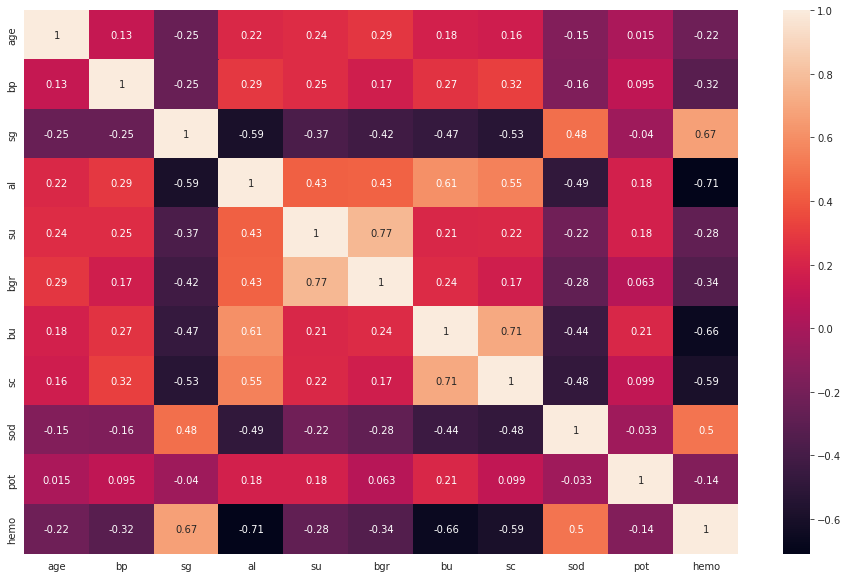

In [ ]:
corr = inuse.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corr, annot = True)

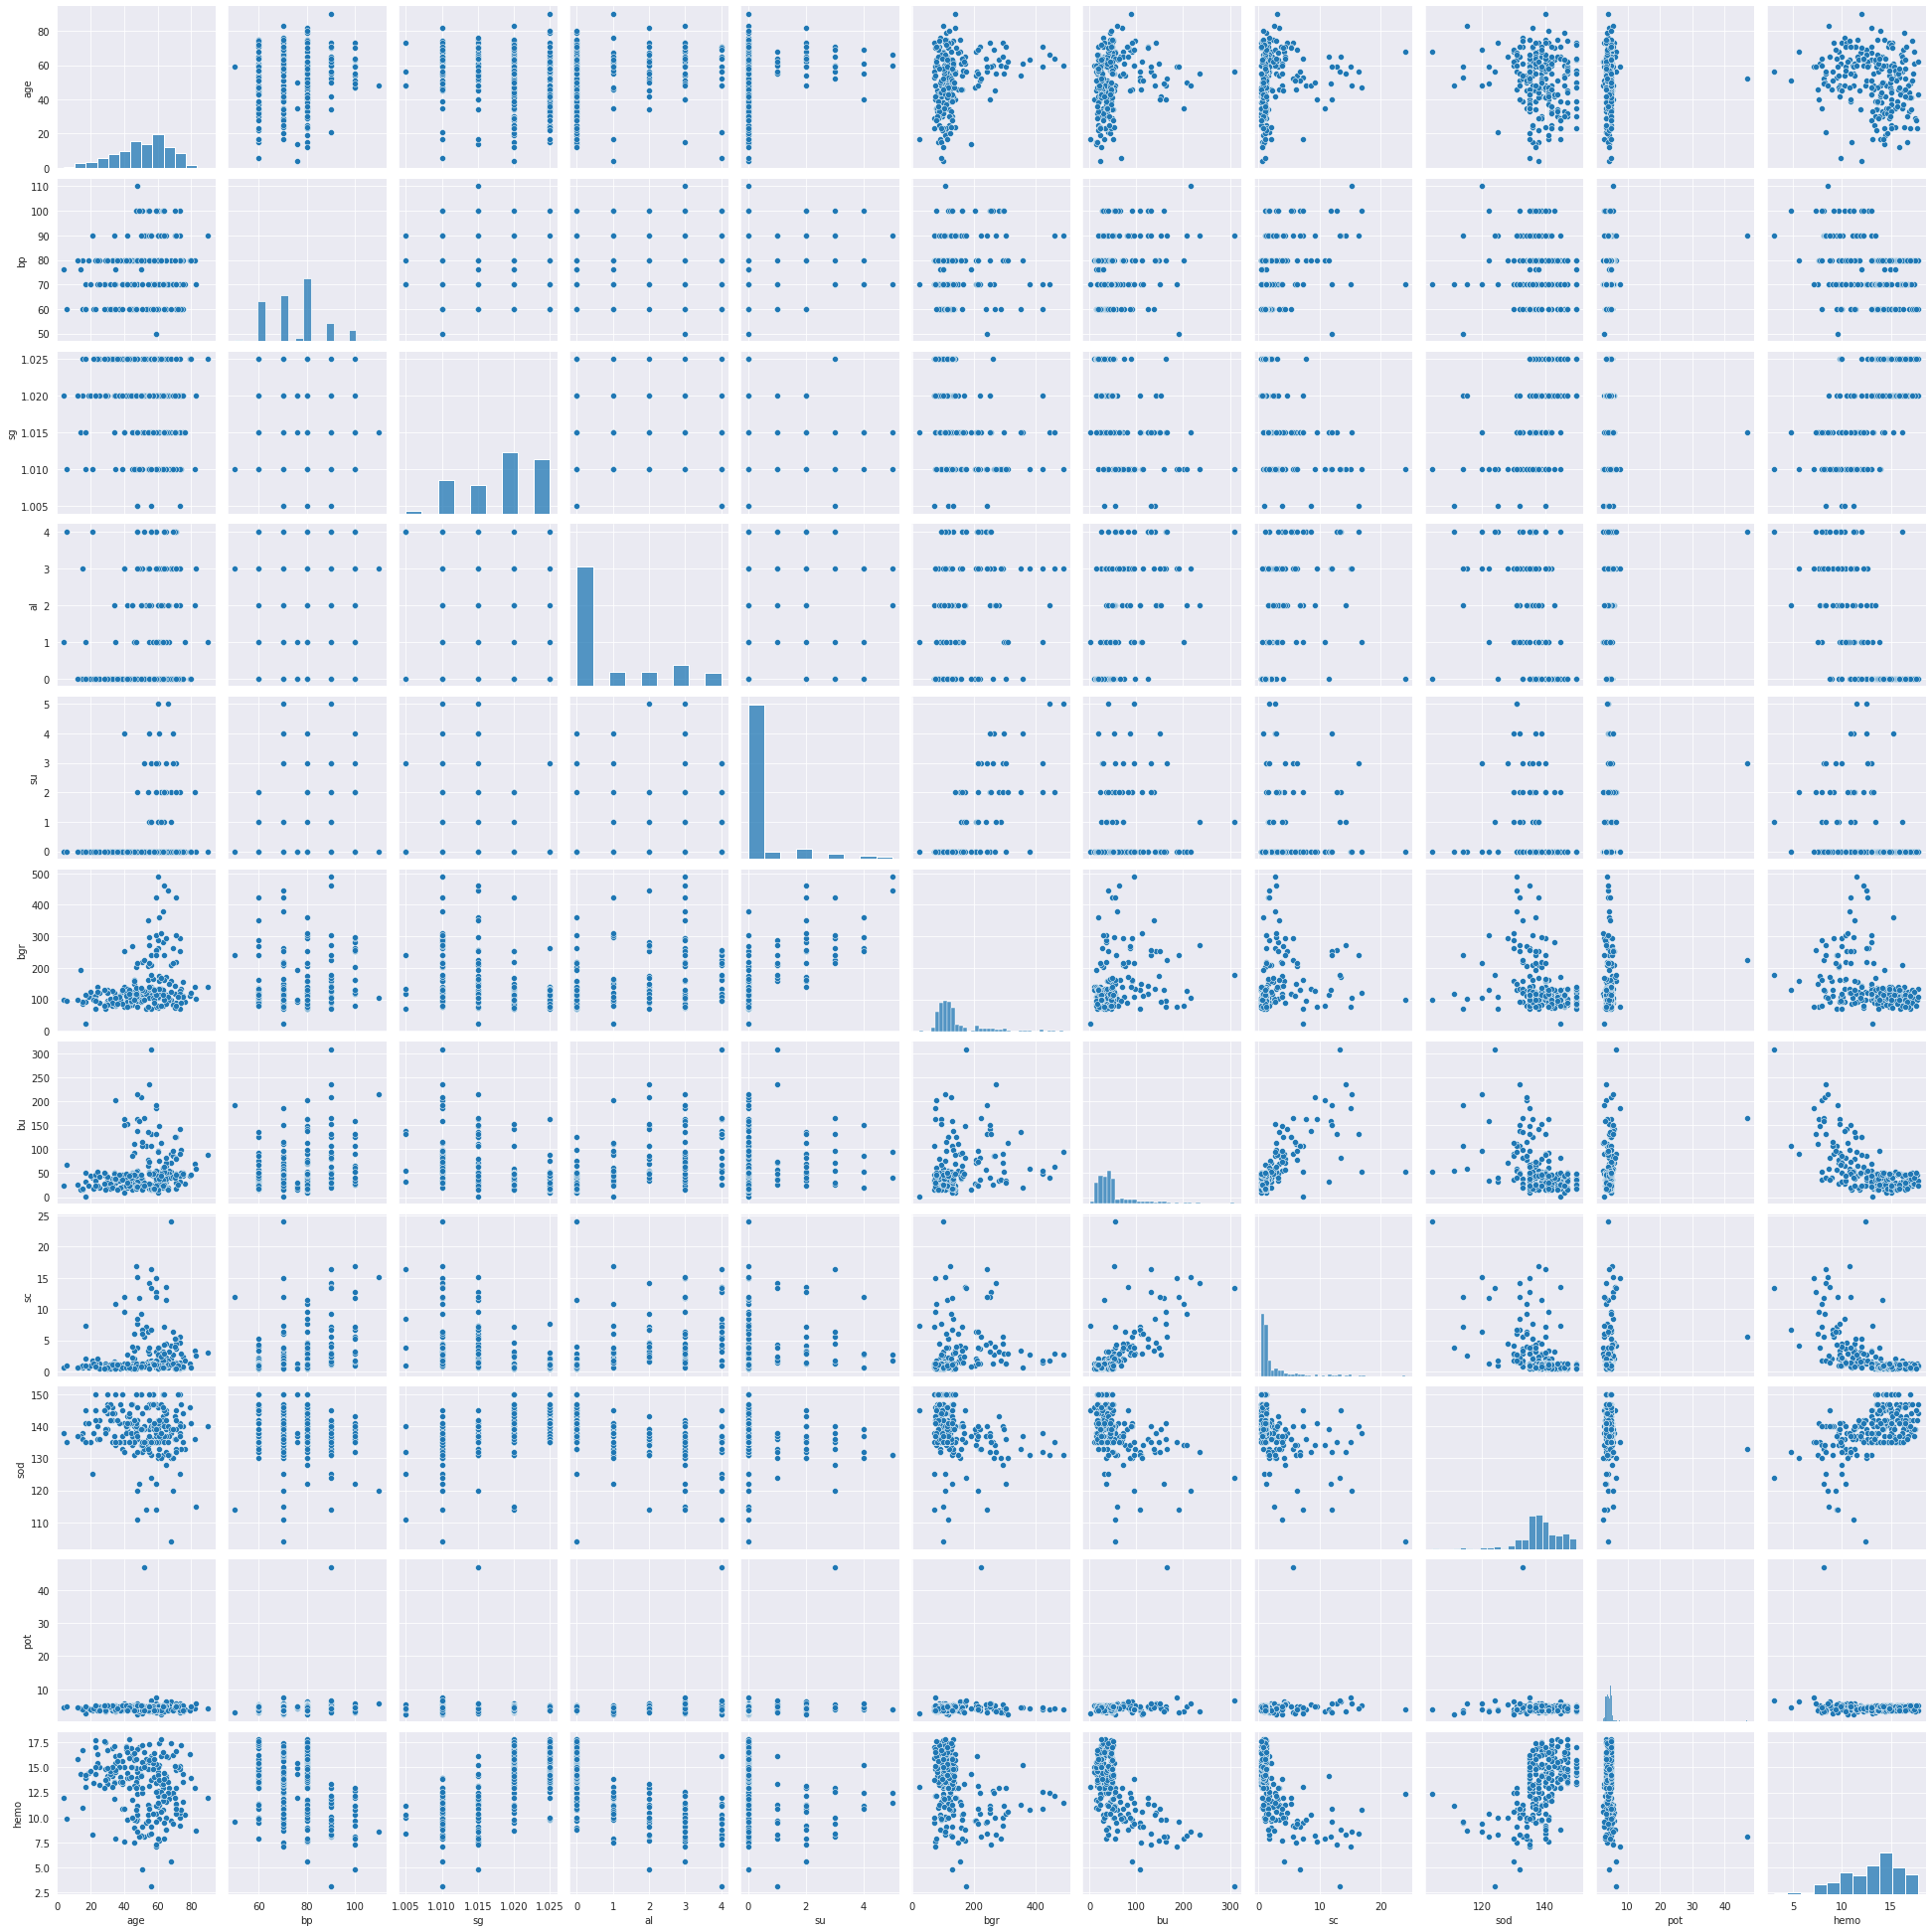

In [ ]:
sns.pairplot(inuse)

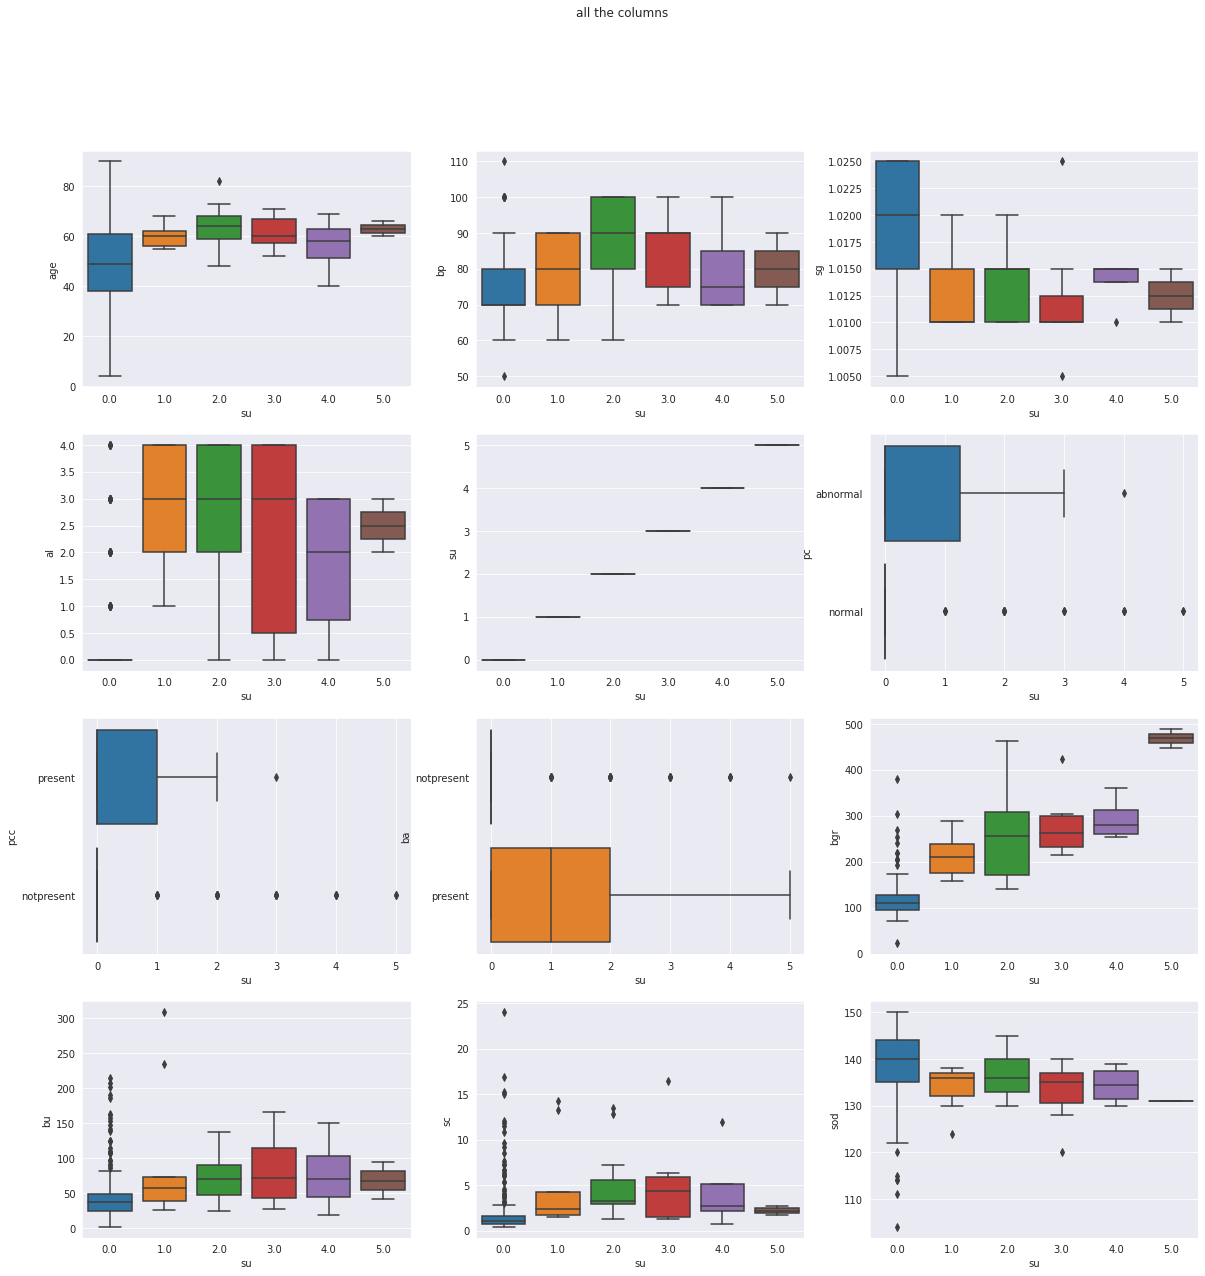

In [ ]:
baru = inuse.select_dtypes(include=object)
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('all the columns')
a = 0
for i in range(4):
  for j in range(3):
    sns.boxplot(ax=axes[i][j], data = inuse, x = inuse['su'] ,y = inuse.columns[a] )
    # plt.hist(ax=axes[i][j], inuse.columns[a])
    a += 1

(array([ 70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

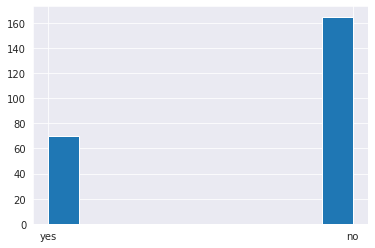

In [ ]:
plt.hist(inuse['htn'])

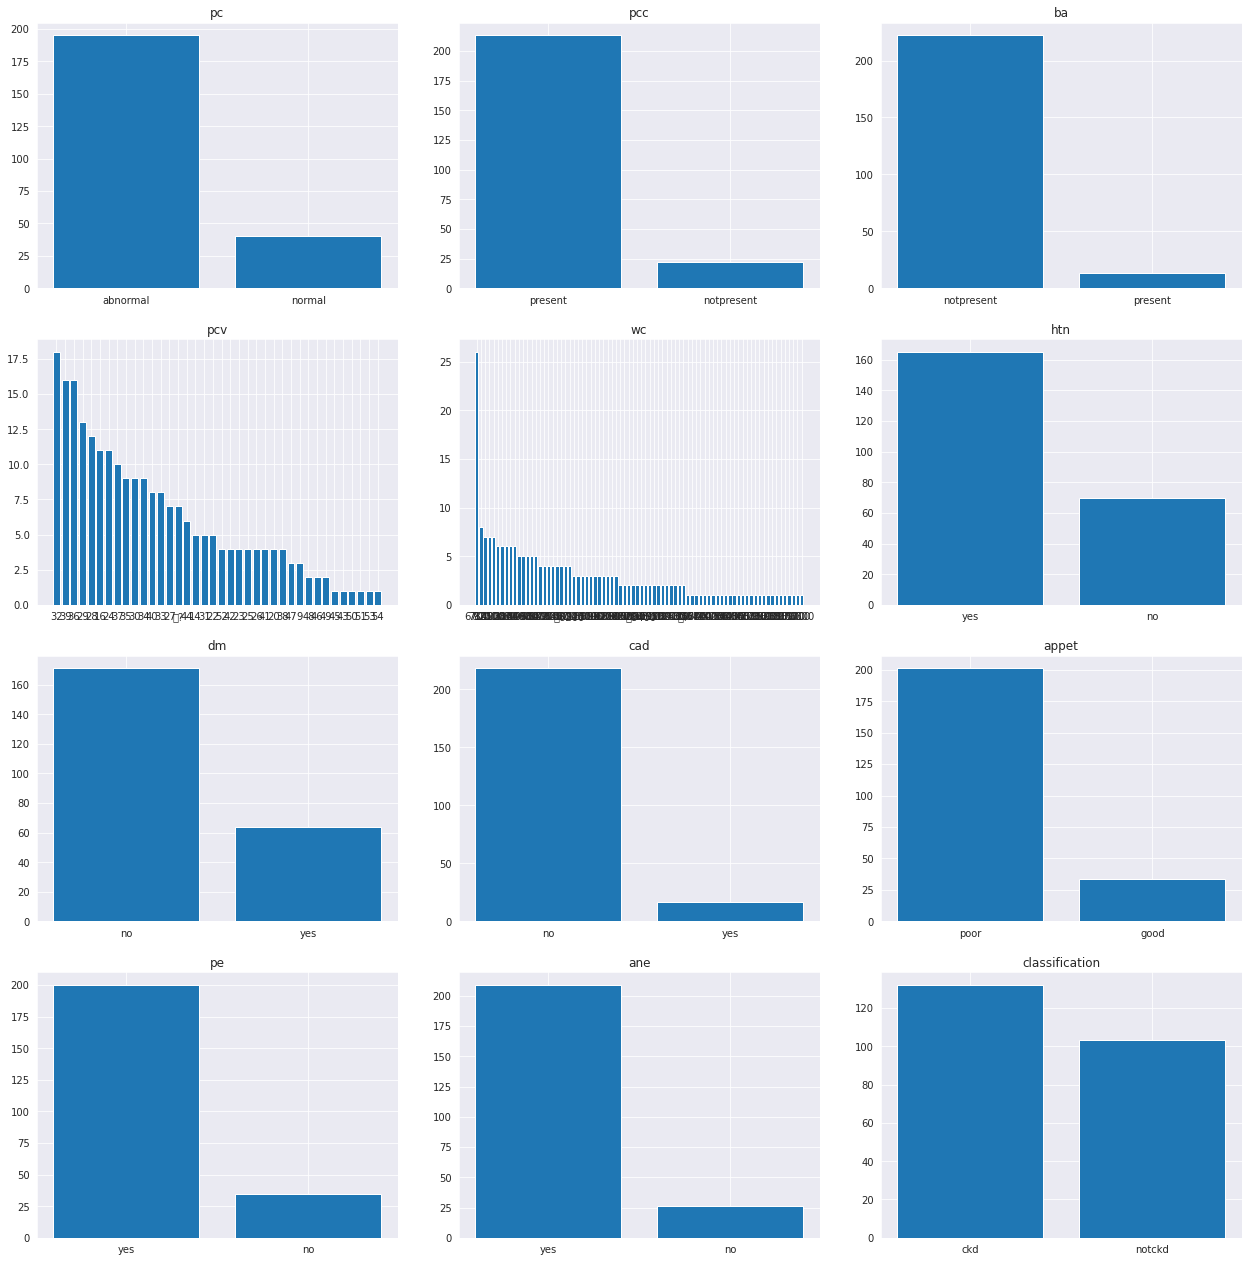

In [ ]:
baru = inuse.select_dtypes(include=object)
fig, axs = plt.subplots(4,3,figsize=(18,18))
fig.tight_layout(pad=3.0)
a=0
for x in range(4):
  for y in range(3):
    key = baru[baru.columns[a]].unique()
    value = baru[baru.columns[a]].value_counts()
    axs[x,y].set_title(baru.columns[a])
    axs[x,y].bar(key,value)
    a+=1

## modelling

modelling e duowo slurrr, modelling jaya jaya jaya

### naive bayes asal dadi

In [ ]:
X = inuse.drop(['classification'], axis = 1)
y = inuse['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((188, 22), (47, 22))

In [ ]:
X_train.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wc        object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [ ]:
cat = [col for col in X_train.columns if X_train[col].dtypes=="O"]
cat
# buat nampilin kolom dtypes objek, buat numeric, tinggal ganti sama dengan di depan pake ! 

['pc', 'pcc', 'ba', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
encode = ce.OneHotEncoder(cols = ['pc', 'pcc', 'ba', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])
X_train = encode.fit_transform(X_train)
X_test = encode.transform(X_test)

In [ ]:
X_train.shape

(188, 141)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# cols = X_train.columns
X_train = pd.DataFrame(X_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# kalo lebih dari 2 pake MultinomialNB()

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
print(y_pred)

['notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd'
 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'ckd']


In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9787


In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

# data training > data test = overfitting
# else underfit

Training set score: 0.9947
Test set score: 0.9787


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21  0]
 [ 1 25]]

True Positives(TP) =  21

True Negatives(TN) =  25

False Positives(FP) =  0

False Negatives(FN) =  1


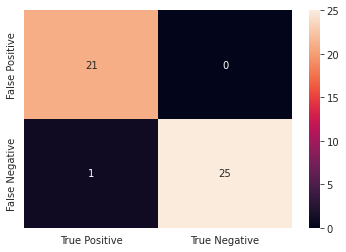

In [ ]:
cm_matrix = pd.DataFrame(data = cm, columns = ['True Positive', 'True Negative'], index = ['False Positive' , 'False Negative'])
sns.heatmap(cm_matrix, fmt= 'd', annot=True)

### cat on steroids, CatBoost!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify = y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = inuse.drop("classification", axis=1)
y = inuse["classification"]

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [ ]:
for i in X_train.select_dtypes(include = ['Int64']).columns:
  X_train[i] = X_train[i].astype('O')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 243 to 147
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     188 non-null    float64
 1   bp      188 non-null    float64
 2   sg      188 non-null    float64
 3   al      188 non-null    float64
 4   su      188 non-null    float64
 5   pc      188 non-null    object 
 6   pcc     188 non-null    object 
 7   ba      188 non-null    object 
 8   bgr     188 non-null    float64
 9   bu      188 non-null    float64
 10  sc      188 non-null    float64
 11  sod     188 non-null    float64
 12  pot     188 non-null    float64
 13  hemo    188 non-null    float64
 14  pcv     188 non-null    object 
 15  wc      188 non-null    object 
 16  htn     188 non-null    object 
 17  dm      188 non-null    object 
 18  cad     188 non-null    object 
 19  appet   188 non-null    object 
 20  pe      188 non-null    object 
 21  ane     188 non-null    object 
dtype

In [ ]:
y_train

243       ckd
298    notckd
267    notckd
225       ckd
20        ckd
        ...  
396    notckd
305    notckd
353    notckd
107       ckd
147       ckd
Name: classification, Length: 188, dtype: object

In [ ]:
clf = CatBoostClassifier(
    iterations = 5,
    learning_rate = 0.1
)
clf.fit(
    X_train, y_train,
    cat_features = cat,
    eval_set = (X_test, y_test),
    verbose = False
)

print('Catboost model is fitted '+ str(clf.is_fitted()))
print('Catboost model parameters '+ str(clf.get_params()))

Catboost model is fitted True
Catboost model parameters {'iterations': 5, 'learning_rate': 0.1}


In [ ]:
y_pred = clf.predict(X_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))
y_pred = clf.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 1.0000
Model accuracy score: 0.9787
